In [169]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as sp
from tqdm import tqdm

In [140]:
def get_experiments_list(base_path="/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results/",model="ff",dataset="mnist"):
    path=f"{base_path}/{model}/{dataset}/"
    experiments_list=os.listdir(path)
    path_list=list()
    for exp in experiments_list:
        exp=f"{path}/{exp}"
        path_list.append(exp)
    return path_list

In [141]:
def parse_stat(path):
    s=list()
    with open(f"{path}/stats.txt", mode="r") as file:
        for line in file:
            if "sparseness" in line:
                s.append(float(line.split()[3]))
            if "Accuracy" in line:
                accuracy=float(line.split()[1])
        split=os.path.basename(path).split("_")
        data= {"name":os.path.basename(path),
               "accuracy":accuracy,
               "s1":s[0],
               "s2":s[1],
               "s3":s[2],
               "norm":split[1],
              "epochs":float(split[2]),
              "batch":float(split[3]),
              "lr":float(split[4]),
              "path":path}
#        df = pd.DataFrame(data, index=[0])
    return data

In [142]:
parse_stat("/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/mnist//relu_l2_300_512_0.001")

{'name': 'relu_l2_300_512_0.001',
 'accuracy': 0.9578,
 's1': 0.8054221777689908,
 's2': 0.5758046390717789,
 's3': 0.45699809028287375,
 'norm': 'l2',
 'epochs': 300.0,
 'batch': 512.0,
 'lr': 0.001,
 'path': '/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/mnist//relu_l2_300_512_0.001'}

In [143]:
list_exp=get_experiments_list(dataset="mnist")
data= {"name":list(),
       "accuracy":list(),
       "s1":list(),
       "s2":list(),
       "s3":list(),
               "norm":list(),
              "epochs":list(),
              "batch":list(),
              "lr":list(),
              "path":list()}
df=pd.DataFrame(data)
for exp in list_exp:
    data = parse_stat(exp)
    df.loc[len(df)] = data # only use with a RangeIndex!
    pd.concat([df, pd.DataFrame([data])], ignore_index=True)    

In [205]:
df[(df["accuracy"]>0.93) & (df["norm"]=="l2")]

,name,accuracy,s1,s2,s3,norm,epochs,batch,lr,path
10,relu_l2_50_512_0.01,0.9378,0.856031,0.688215,0.709026,l2,50.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
15,relu_l2_200_512_0.001,0.9557,0.790905,0.551730,0.476800,l2,200.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
16,relu_l2_500_512_0.001,0.9534,0.820378,0.531122,0.487990,l2,500.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
31,relu_l2_20_512_0.01,0.9345,0.834481,0.628630,0.745989,l2,20.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
35,relu_l2_1200_512_0.0001,0.9398,0.752434,0.564937,0.385703,l2,1200.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
36,relu_l2_500_512_0.0001,0.9324,0.678578,0.595637,0.515448,l2,500.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
40,relu_l2_1200_512_0.01,0.9316,0.889719,0.446442,0.138850,l2,1200.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
46,relu_l2_100_512_0.001,0.9437,0.763042,0.572765,0.568760,l2,100.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
56,relu_l2_30_512_0.01,0.9442,0.848124,0.663958,0.740060,l2,30.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
69,relu_l2_1000_512_0.0001,0.9354,0.744980,0.579729,0.426742,l2,1000.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...


In [206]:
df.loc[10]["path"]

'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/mnist//relu_l2_50_512_0.01'

In [207]:
df_filtered2=df[(df["norm"]=="l2") & (df["accuracy"]>=0.8)]
df_filtered1=df[(df["norm"]=="l1") & (df["accuracy"]>=0.8)]


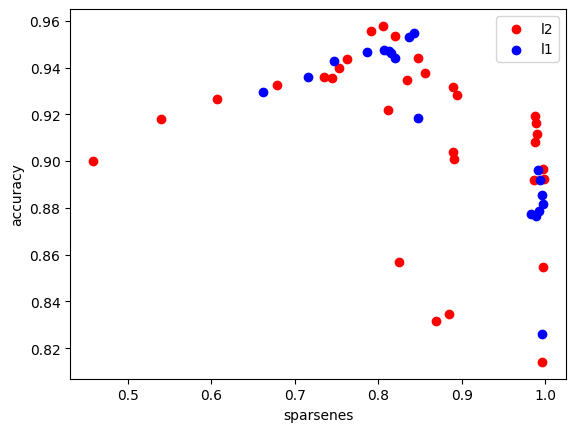

In [208]:
plt.scatter(df_filtered2["s1"],df_filtered2["accuracy"],color="r",label="l2")
plt.scatter(df_filtered1["s1"],df_filtered1["accuracy"],color="b",label="l1")
plt.xlabel("sparsenes")
plt.ylabel("accuracy")
plt.legend()

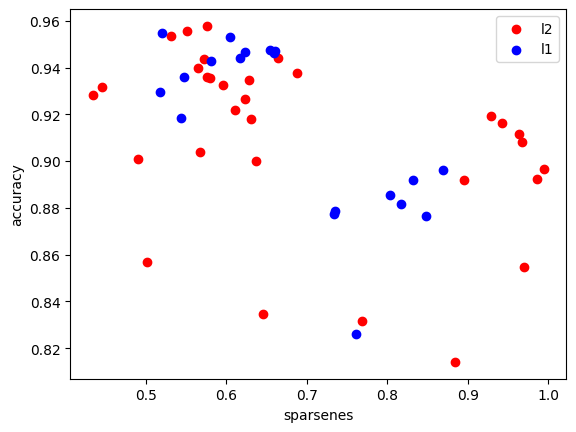

In [209]:
plt.scatter(df_filtered2["s2"],df_filtered2["accuracy"],color="r",label="l2")
plt.scatter(df_filtered1["s2"],df_filtered1["accuracy"],color="b",label="l1")
plt.xlabel("sparsenes")
plt.ylabel("accuracy")
plt.legend()

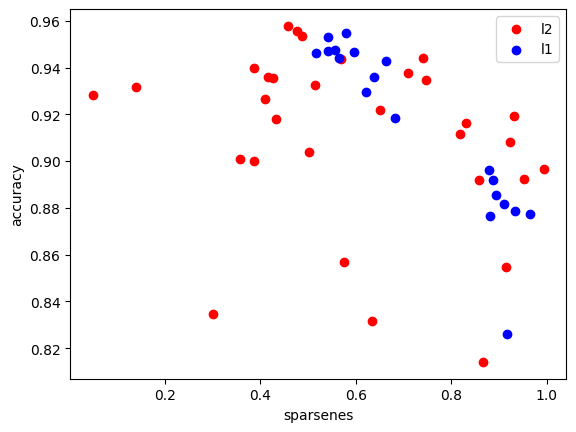

In [210]:
plt.scatter(df_filtered2["s3"],df_filtered2["accuracy"],color="r",label="l2")
plt.scatter(df_filtered1["s3"],df_filtered1["accuracy"],color="b",label="l1")
plt.xlabel("sparsenes")
plt.ylabel("accuracy")
plt.legend()

In [211]:
def ensembles_fast(representation, thr=0.05):
    ensemble=[]
    for n_id in tqdm(range(representation.shape[1])):
        pvalues=[]
        for n2_id in range(n_id+1,representation.shape[1]):
            if n_id==n2_id:
                continue
            else:
                pvalues.append(sp.stats.kstest(representation[:,n_id], representation[:, n2_id]).pvalue)
        pvalues=np.array(pvalues)
        if pvalues.mean()<thr:
            ensemble.append(n_id)
    return ensemble

In [232]:
def loader(path=""):
    print(path)
    try:
        preds=np.load(path+'/prediction_0.npy')
        reps=np.load(path+'/reps_0.npy')
        lbls=np.load(path+'/lbls_0.npy')
        
        order=np.argsort(lbls)
        reps=reps[order]
        lbls=lbls[order]
        preds=preds[order]
        
        correct=(lbls==preds)
        reps=reps[correct]
        lbls=lbls[correct]
        return reps,lbls
    except:
        print("R.I.P in pace")
    

In [233]:
df[(df["accuracy"]>0.93) & (df["norm"]=="l2")]

,name,accuracy,s1,s2,s3,norm,epochs,batch,lr,path
10,relu_l2_50_512_0.01,0.9378,0.856031,0.688215,0.709026,l2,50.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
15,relu_l2_200_512_0.001,0.9557,0.790905,0.551730,0.476800,l2,200.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
16,relu_l2_500_512_0.001,0.9534,0.820378,0.531122,0.487990,l2,500.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
31,relu_l2_20_512_0.01,0.9345,0.834481,0.628630,0.745989,l2,20.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
35,relu_l2_1200_512_0.0001,0.9398,0.752434,0.564937,0.385703,l2,1200.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
36,relu_l2_500_512_0.0001,0.9324,0.678578,0.595637,0.515448,l2,500.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
40,relu_l2_1200_512_0.01,0.9316,0.889719,0.446442,0.138850,l2,1200.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
46,relu_l2_100_512_0.001,0.9437,0.763042,0.572765,0.568760,l2,100.0,512.0,0.0010,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
56,relu_l2_30_512_0.01,0.9442,0.848124,0.663958,0.740060,l2,30.0,512.0,0.0100,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...
69,relu_l2_1000_512_0.0001,0.9354,0.744980,0.579729,0.426742,l2,1000.0,512.0,0.0001,/orfeo/cephfs/home/area/ntosato/scratch/pippo/...


In [234]:
reps,lbl=loader(df.loc[10]["path"])

/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/mnist//relu_l2_50_512_0.01


In [249]:
a=ensembles_fast(reps[lbl==0][:,0,:])

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 769/784 [02:21<00:00, 74.06it/s]/tmp/ipykernel_3821739/4028548474.py:24: RuntimeWarning: Mean of empty slice.
  if pvalues.mean()<thr:
/orfeo/cephfs/scratch/area/ntosato/pippo/ForwardForward-machiavelli/analysis/analysis_thin_venv/lib64/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 784/784 [02:21<00:00,  5.54it/s]


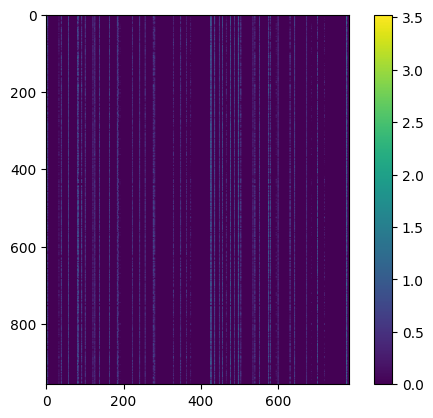

In [236]:
plt.imshow(reps[lbl==0][:,0,:])
plt.colorbar()

(9378, 3, 784)


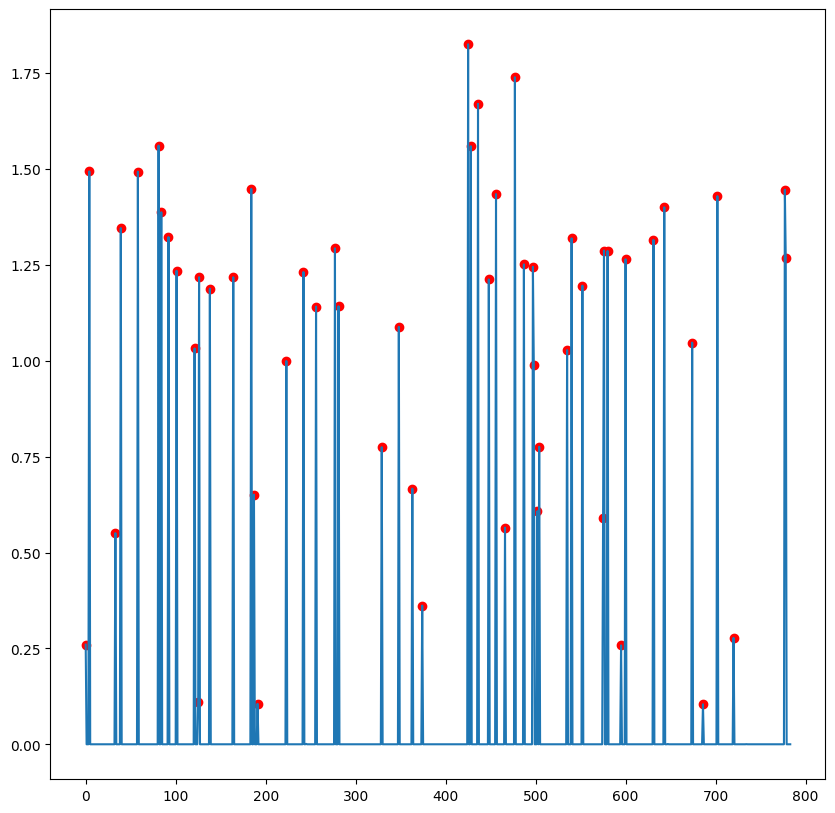

In [256]:
print(reps.shape)
reps_mean=reps[lbl==0][:,0,:].mean(axis=0)
plt.figure(figsize=(10,10))
plt.plot(reps_mean)
plt.scatter(a,reps_mean[a],color="r")

In [248]:
np.sum(reps[lbl==0][:,0,:].mean(axis=0)>0.5)

47